In [2]:
!pip install pyod

In [3]:

import pandas as pd
from pyod.models.iforest import IForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:

# Load merged data
df = pd.read_csv(r"C:\Users\naman\OneDrive\Desktop\PRJ\data\processed\merged_data.csv")
df['ds'] = pd.to_datetime(df['ds'])


In [5]:

# Select multivariate features
features = ['y', 'TOTAL SPECIMENS', 'A (H3)', 'B', 'BVic', 'BYam']
df_features = df[features].fillna(0)


In [6]:

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)


In [7]:

# Initialize and fit Isolation Forest
model = IForest()
model.fit(X_scaled)


IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [8]:

# Predict anomalies
df['anomaly'] = model.predict(X_scaled)  # 1 = outlier, 0 = normal


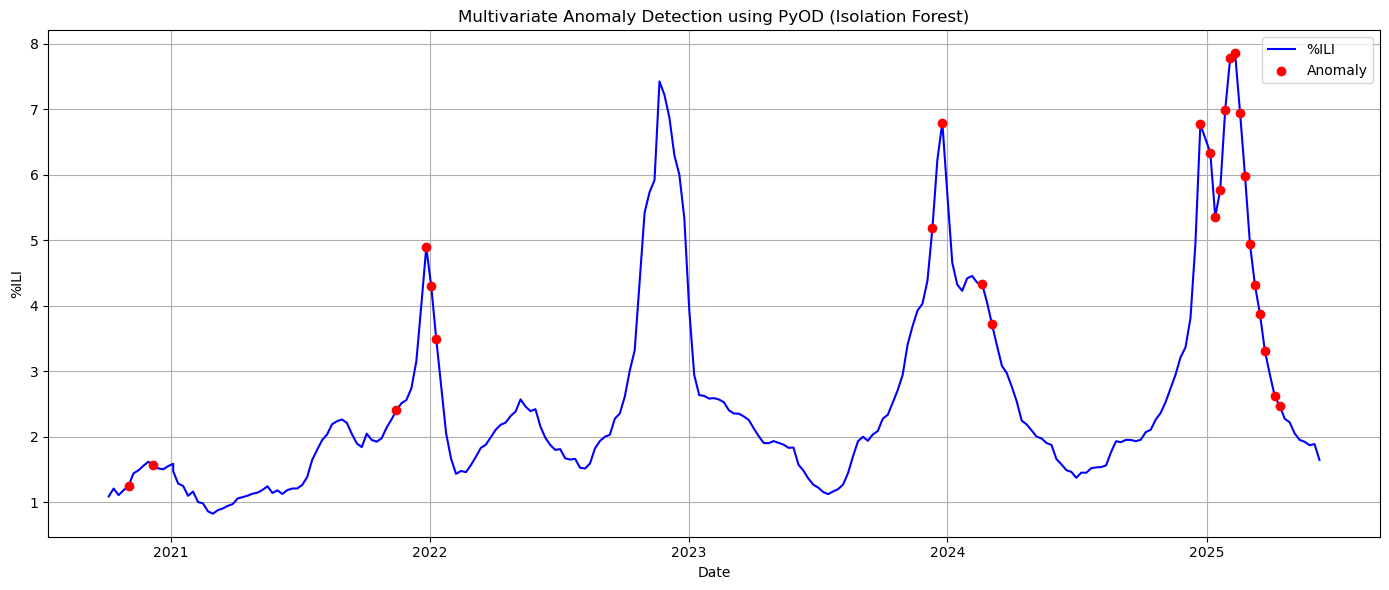

In [9]:

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df['ds'], df['y'], label='%ILI', color='blue')
plt.scatter(df[df['anomaly'] == 1]['ds'], df[df['anomaly'] == 1]['y'], 
            color='red', label='Anomaly', zorder=5)
plt.title("Multivariate Anomaly Detection using PyOD (Isolation Forest)")
plt.xlabel("Date")
plt.ylabel("%ILI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
